# Group Members:


<font color='blue'>**PUT NAMES OF YOUR TEAM MEMBERS HERE**

*   Telmo Linacisoro Leyendecker 253251
*   Paula Ceprián 252503

# Guide

In this lab we will solve several optimization problems which are constrained by one or more equalities and inequalities. We will solve them by using both the KKT optimality conditions and the Python function `scipy.optimize.minimize`.


For any doubts before and after the practice, you can contact your teacher:

Nneka Okolo - nnekamaureen.okolo@upf.edu

Pablo Arias - pablo.arias@upf.edu

Adriano Pastore - adriano.pastore@upf.edu

\\

**Deadlines**: See
[P101](https://calendar.google.com/calendar/embed?src=c_b679939a9db8a1d8cd9f01f62d373d173f76794e4137c40e793a8d2cb11708f8%40group.calendar.google.com&ctz=Europe%2FMadrid/),
[P102](https://calendar.google.com/calendar/embed?src=c_5a65338fe8c3ce7909e62bb6b572b1a61ff4ad3543b12f72468e1a16bca41bd0%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P201](https://calendar.google.com/calendar/embed?src=c_58aa336a0c5d0a38b13dd4a38071e7d8f9a18f4306ffeef2e48276087c339163%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P202](https://calendar.google.com/calendar/embed?src=c_dac1d492e1060f3cee35420a9c2ff0d345e89a002cc8c70fe74bf0b78bf99d37%40group.calendar.google.com&ctz=Europe%2FMadrid),


\\

**Submission instructions**

Complete the code and answer the questions below.

Export the notebook with the answers using the menu option File->Download .ipynb.

Rename exported notebook with the format **lastnameUid.ipynb** where lastname is the first surname of **Member 1** in the form and Uid is their UPF ID.

Submit your solution [here](https://forms.gle/AdYQwDEjAta1QaRY6) by the deadline. **Only one member needs to complete this step**.

You will receive an acknowledgement of receipt.

\\

**Grading**:

The evaluation is based on the report documenting your work (with figures), results, conclusions and the commented code together.

**Instructions for answering the questions.**

Questions are indicated in blue. Some questions require answers in the form of text, some others require completing code. See the examples below. *Please do not modify the notebook outside of these cells.*

<font color='blue'>**(QUESTION 42)** Based on what you know at this moment, answer these questions:
1. What are your favorite subjects?
2. What are your favourite hobbies?
</font>

<font color='red'>**ANSWER**</font>

1. I only like one subject: "Optimization Techniques."
1. I like writing equations $e^{i\pi} + 1 = 0$

<font color='blue'>**(QUESTION 43)** This is a coding question. There is no <font color='red'>**ANSWER**</font> cell. Instead, you should complete the code cell following the question. Typically, you'll find TODOs in the code indicating the places that you are expected to complete.
</font>

In [22]:
a = None     # TODO substitute the None by a nice number to print
print("The number a is {}".format(a))

The number a is None


# Karush-Kuhn-Tucker (KKT) optimality conditions



Let first review some of the related concepts and methods. Consider the smooth functions
$f,c_1,\cdots,c_k,d_1,\ldots,d_r:\mathbb R^n\to\mathbb R$,
and the following constrained optimization problem $\mathcal P$:

$$
  (\mathcal P) \left\{
	\begin{array}{llll}
	\text{minimize }  & f(\mathbf x), &  & \\
	\text{subject to } & c_i(\mathbf x)\geq 0, & i = 1,...,k & \text{(inequality constraints),}\\
                     & d_j(\mathbf x) = 0, & j = 1,...,r & \text{(equality constraints).}
	\end{array}\right.
$$


Suppose that there is a  **minimum** $\mathbf x_0$ of $(\mathcal P)$.

It coincides with a **saddle point** $(\mathbf x_0,\boldsymbol{\lambda}^0,\boldsymbol{\nu}^0)$ of $\mathcal{L}(\mathbf x,\boldsymbol\lambda,\boldsymbol\nu)$, for
$$\mathcal{L}(\mathbf x,\boldsymbol\lambda,\boldsymbol\nu) = f(\mathbf x) - \sum_{i=1}^k \lambda_i c_i(\mathbf x) -  \sum_{j=1}^r \nu_j d_j(\mathbf x).$$

The method of Lagrange Multipliers is used to find the solution for optimization problems constrained to one or more equalities. When our constraints also have inequalities, we need to extend the method to the KKT conditions.


The *Karush-Kuhn-Tucker* (KKT) optimality conditions are

\begin{align*}
\nabla_x {\mathcal{L}}(\mathbf x_0, \boldsymbol\lambda^0) &= \mathbf 0 & \text{stationarity}\\
c_i(\mathbf x_0) &\geq 0 \quad  i = 1,...,k & \text{primal feasibility}\\
d_j(\mathbf x_0) &= 0 \quad j = 1,...,r& \text{primal feasibility}\\
\lambda^0_i &\geq 0 \quad i = 1,...,k & \text{dual feasibility} \\
\lambda^0_i c_i(x_0) &= 0 \quad i = 1,...,k& \text{complementary slackness}
\end{align*}



# Toy problem



Consider the function $f:\mathbb{R}^2\to\mathbb{R}$ defined by
$f(x_1,x_2)=x_2$, and the problem

$$
\left\{
\begin{array}{lll}
\text{minimize} & f(x_1,x_2) = x_2 \\
\text{subject  to} &   9 \geq (x_1-1)^2 + (x_2-2)^2 \\
                   &  x_2\leq 0
\end{array}
\right.
$$



<font color='blue'>**(QUESTION 1.1)**
Sketch the set of constraints of the problem and the level lines of the objective function.
</font>

<font color='red'>**ANSWER:**</font>

<font color='red'>Notice how the constraints define a circle and a line. Thus, we will get a plot subject to these conditions. The first inequality describes a circle centered at (1, 2) with a radius of 3. The second inequality restricts the region to points where x₂ is less than or equal to 0, meaning we are looking at the lower half of the plane. The intersection of these two will be our region. In regards to the objective function, notice how it represents a plane parallel to the x₁-axis, with level lines going infinitely in the x₂ direction. To find the normal vector to the level lines, we look at the gradient of the function, which is [0, 1] and plot the orthogonal.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

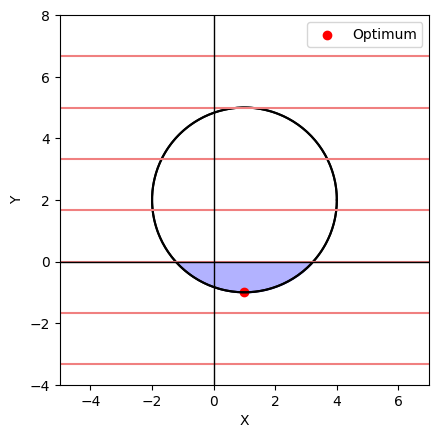

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Circle parameters
radius = 3
center = (1, 2)

# Create an array of angles from 0 to 2*pi
angles = np.linspace(0, 2 * np.pi, 100)

# Compute the x and y coordinates of the circle
x = center[0] + radius * np.cos(angles)
y = center[1] + radius * np.sin(angles)

# Plot the circle
ax.plot(x, y, color='black')

# Fill the area inside the circle where y <= 0
ax.fill_between(x, 0, y, where=(y <= 0), color='blue', alpha=0.3)

# Create a grid of points for plotting the level lines
x1_vals = np.linspace(-5, 10, 100)
x2_vals = np.linspace(-5, 10, 100)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
x_grid = np.array([x1_grid, x2_grid])

# Objective function
def objective_function_1(x):
    return x[1]

# Constraint functions
def constraint(x):
    return (x[0] - center[0])**2 + (x[1] - center[1])**2

# Compute the constraint values on the grid
constraint_grid = constraint(x_grid)

# Plot the constraint set
ax.contour(x1_grid, x2_grid, constraint_grid, levels=[radius**2], colors='black')

# Plot the level lines of the objective function (light red, solid lines)
ax.contour(x_grid[0], x_grid[1], objective_function_1(x_grid), levels=np.linspace(-5, 10, 10), colors='lightcoral', linestyles='solid')

# Set the plot limits and labels
ax.set_xlim(center[0] - radius - 3, center[0] + radius + 3)
ax.set_ylim(center[1] - radius - 3, center[1] + radius + 3)
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Add a dot at (1, -1) (red)
ax.scatter(1, -1, color='red', label='Optimum')

# Add legend
ax.legend()

# Add x and y axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# Set the plot aspect to be equal
ax.set_aspect('equal')

# Show the plot
plt.show()

<font color='blue'>**(QUESTION 1.2)**
From your sketch, guess the solution of the problem.
</font>

<font color='red'>**ANSWER:**</font>

<font color='red'>The solution must satisfy both constraints whilst minimizing the objective function. Because the normal to the level lines is [0, 1] we know that the direction of steepest increase is towards the top and the minimum towards the bottom, and we can therefore say that it will be at the bottom part of the circle at [1, -1].

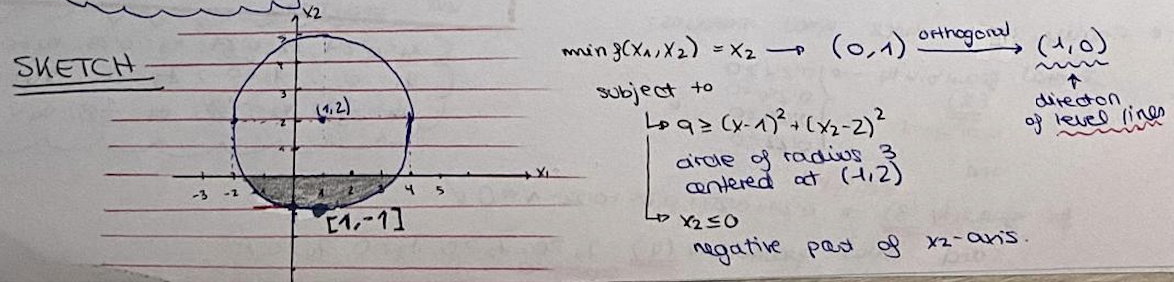

<font color='blue'>**(QUESTION 1.3)**
Find the solution using the function `scipy.optimize.minimize` from Python.
</font>

In [25]:
# Constraint functions
def constraint1_1(x):
    return  -(x[0] - 1)**2 - (x[1] - 2)**2 + 9

def constraint2_1(x):
    return -x[1]

def solve_optimization_1(cons):

    result = minimize(objective_function_1,x0=[30,50],method='SLSQP',constraints=cons)
    x = result.x

    # we have rounded the x values to 2 decimals to avoid further issues when comparing to zero
    x[0] = round(x[0],2)
    x[1] = round(x[1],2)

    print("Result:",x)
    print()

con1 = {'type': 'ineq', 'fun': constraint1_1}
con2 = {'type': 'ineq', 'fun': constraint2_1}
cons = [con1, con2]

solve_optimization_1(cons)

Result: [ 1. -1.]



<font color='blue'>**(QUESTION 1.4)**
Write the KKT optimality conditions and check
if the minimum satisfy these conditions. Find the
solution of the dual variable/s from the KKT conditions.
</font>

<font color='red'>**ANSWER:**</font>

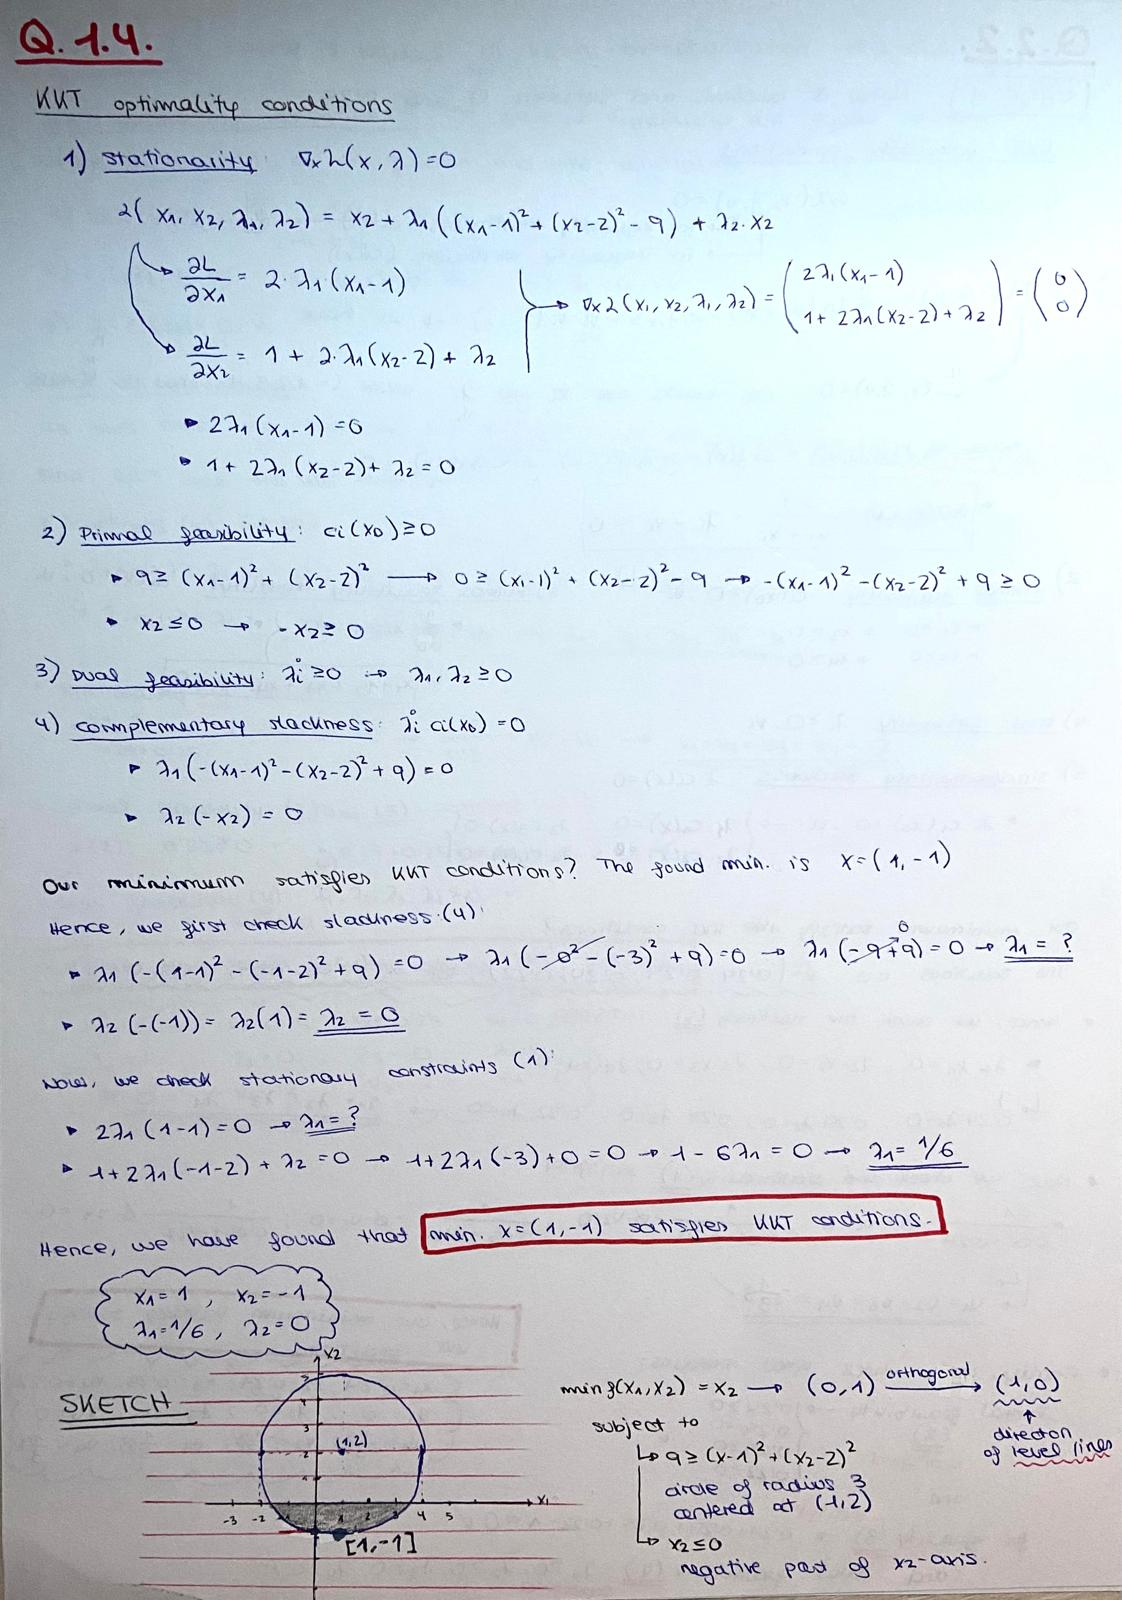

# Water-filling


This problem arises in Information Theory, in allocating power to a set of $n$ communication channels. Indeed, let us assume that we have a communication network and we would like to maximize the capacity or communication rate of the network.
Let a variable $x_i$ represent the capacity or transmitter power allocated to the $i$-th channel (connecting, e.g., two nodes of the communication network). Let $\alpha_i>0$ represent a certain level of noise. Now, $\ln (\alpha_i + x_i)$ gives the capacity or communication rate of the $i$-th channel. Assuming that the network has $n$ communication channels, the problem is to allocate a total power of one to the channels, in order to maximize the total communication rate:
$$
\sum_{i=1}^{n} \ln (\alpha_i + x_i)
$$
In other words, the convex optimization problem we have to consider is
$$
\left\{
	\begin{array}{ll}
	\text{minimize}  & - \displaystyle\sum_{i=0}^{n} \ln (\alpha_i + x_i)\\
	\text{subject to } & \mathbf x\geq 0 \\
	                   & \sum_{i=0}^{n}
										 x_i-1 = 0
	\end{array}
\right.
$$


<font color='blue'>**(QUESTION 2.1)**
Find the solution using the function `scipy.optimize.minimize` from Python of a network with four communication channels and the following two cases
1. where the noise is random and between 0 and 0.25
2. the noise is equal in each communication channel.

Comment each case.
</font>



<font color='red'>**ANSWER:**</font>

<font color='red'>

1. Case 1: when the noise is random, that is, when the alphas are different, the solution has a wider range of values. Analyzing the alphas and their results we can see that a lower alpha value gives a higher solution, whereas with higher alpha values happens the opposite, that is, gives a smaller solution.
2. Case 2: when noise is equal in each channel, that is, alpha values are equal, all results are almost equal for each water cup. Concretely, we obtain 0.25 for each one (rounding the results).  

In [26]:
def objective_function_2(x, alpha):
    total = 0
    for i in range(len(x)):
        total += np.log(alpha[i] + x[i])
    return -total

def constraint1_2(x):
    return x

def constraint2_2(x):
    return x.sum() - 1

def solve_optimization_2(alpha, c):

    con1 = {'type': 'ineq', 'fun': constraint1_2}
    con2 = {'type': 'eq', 'fun': constraint2_2}
    cons = [con1, con2]

    solution = minimize(objective_function_2, x0=[2, 3, 1, 2], args=(alpha,), method='SLSQP', constraints=cons)
    solution = solution.x

    rate = solution + alpha
    if c == 1:
        print('1. Where the noise is random and between 0 and 0.25:')
    elif c == 2:
        print('2. The noise is equal in each communication channel.')
    print('Alpha:', alpha)
    print("Optimization result:", solution)
    print("Rate of the channel:", rate)
    print()

# Case 1
alpha_1 = np.round(np.random.random(4)*0.25, 2)
solve_optimization_2(alpha_1, 1)

# Case 2
alpha_2 = np.array([0.25] * 4)
solve_optimization_2(alpha_2, 2)

1. Where the noise is random and between 0 and 0.25:
Alpha: [0.21 0.1  0.16 0.12]
Optimization result: [0.18733917 0.29751936 0.23755919 0.27758228]
Rate of the channel: [0.39733917 0.39751936 0.39755919 0.39758228]

2. The noise is equal in each communication channel.
Alpha: [0.25 0.25 0.25 0.25]
Optimization result: [0.24999525 0.24999852 0.2499973  0.25000893]
Rate of the channel: [0.49999525 0.49999852 0.4999973  0.50000893]



<font color='blue'>**(QUESTION 2.2)**
Write  the  KKT  optimality  conditions  and  check  if  the  minimum  satisfy  these conditions for each case.  Find the solution of the dual variable/s from the KKT conditions
</font>



<font color='red'>**ANSWER CASE 1:**</font>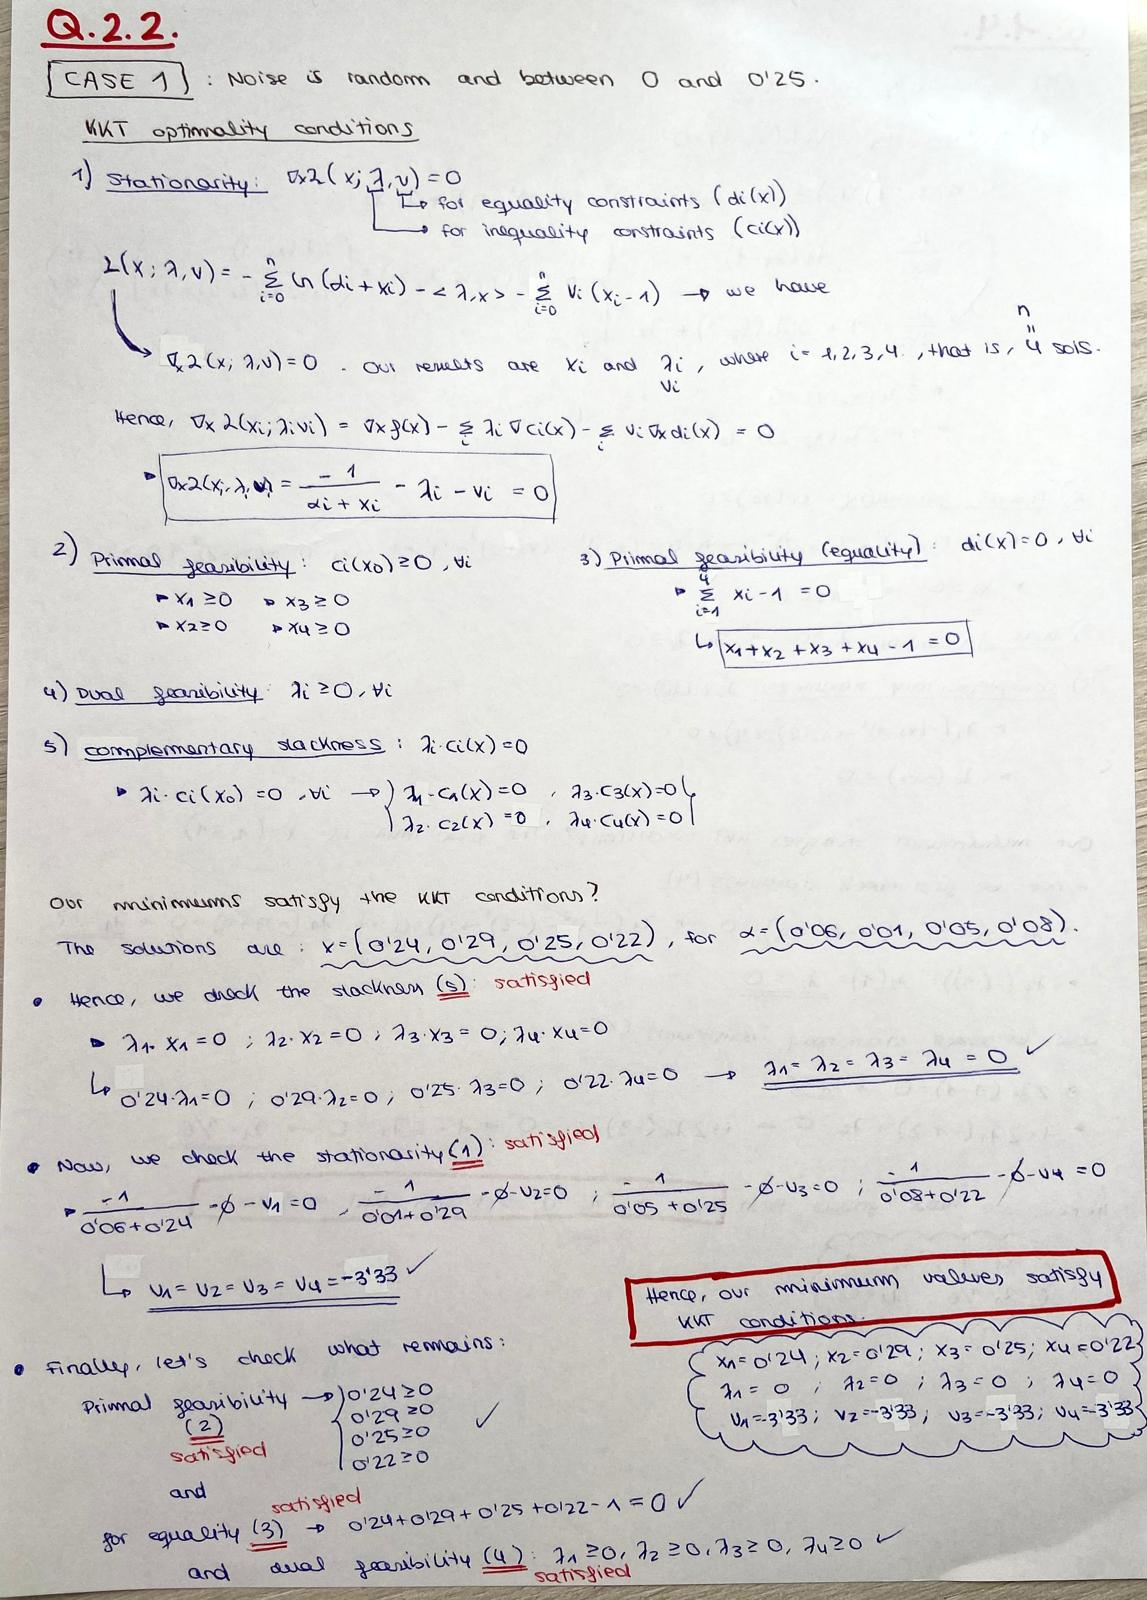

<font color='red'>**ANSWER CASE 2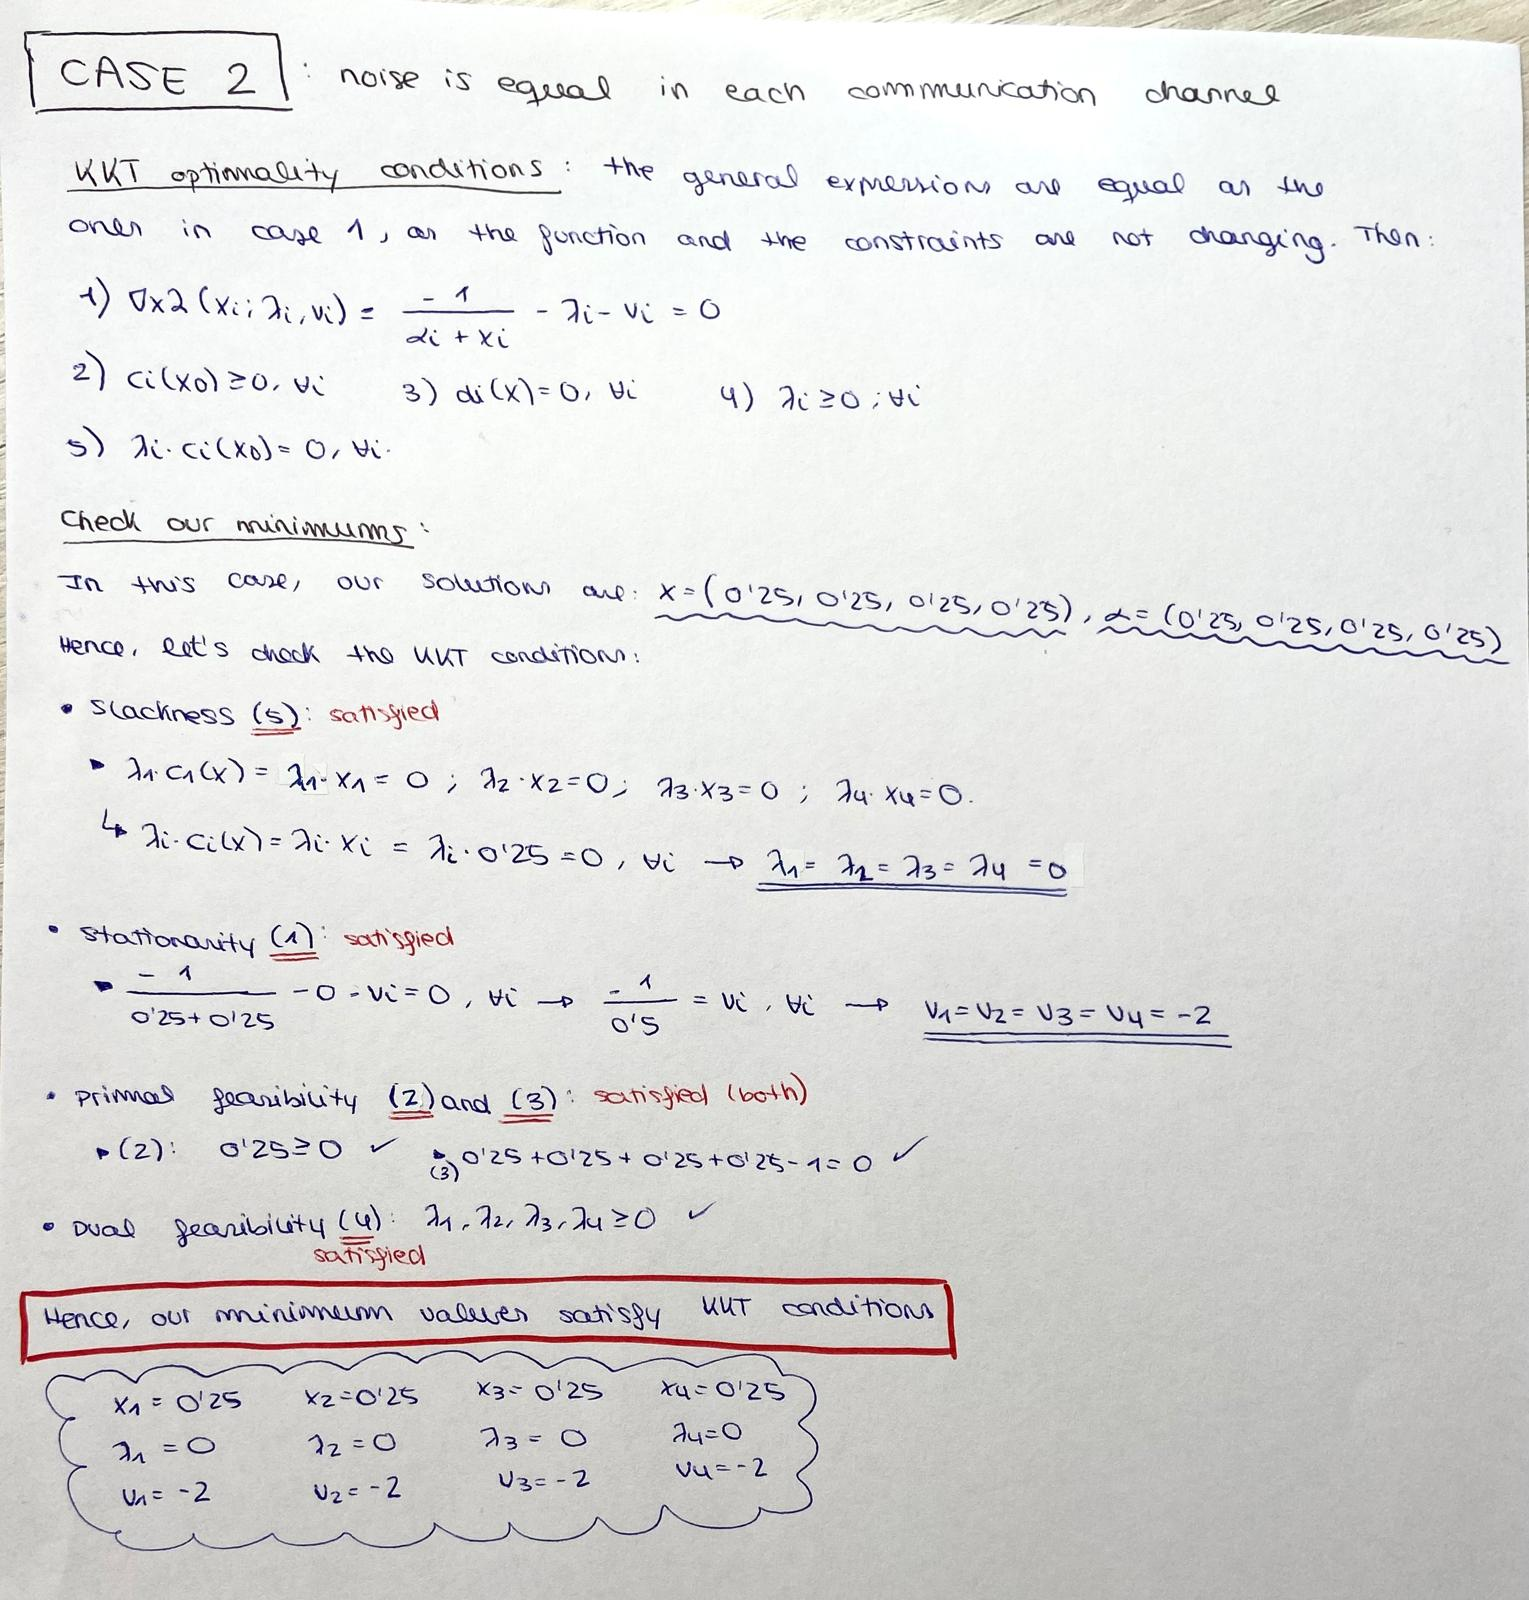**</font>

# Entropy maximization problem


We'll use the simplest version of entropy maximization for this lab. Entropy maximization is an important basic problem in information theory.

$$
\left\{
	\begin{array}{ll}
	\text{minimize} & f(\mathbf x) = \displaystyle\sum_{i=0}^{n}x_i \ln x_i\\
	\text{subject to} & \mathbf A\mathbf x\leq \mathbf b  \\
	                  & \sum_{i=0}^{n}
										x_i - 1 = 0
	\end{array}
\right.
$$

where $n=2$,
$$\mathbf A = \begin{pmatrix} 2 & 0 \\ 0 & 3 \end{pmatrix} \text{ and }
\mathbf b = \begin{pmatrix} 7  \\ 1 \end{pmatrix}.$$



<font color='blue'>**(QUESTION 3.1)**
Find the solution using the function `scipy.optimize.minimize` from Python.
</font>



In [27]:
# Objective function
def objective_function_3(x):
  sum = 0
  for i in range(0, len(x)):
    sum += x[i]*np.log(x[i])
    return sum

A = np.array([[2, 0], [0, 3]])
b = np.array([7, 1])

# Inequality constraints
def constraint1_3(x, A, b):
    return - np.dot(A, x) + b

# Equality constraint
def constraint2_3(x):
    one = [1,1]
    return np.dot(one,x) - 1

# Optimization problem
def solve_optimization_3():
    x0 = [0.5, 0.5]

    result = minimize(objective_function_3,x0,method='SLSQP',constraints = cons)

    print("Optimization result:")
    print("x =", result.x)
    print("f(x) =", result.fun)

con1 = {'type':'ineq', 'fun' : constraint1_3, 'args' : (A,b)}
con2 = {'type':'eq', 'fun' : constraint2_3,}
cons = [con1,con2]

solve_optimization_3()

Optimization result:
x = [0.66666667 0.33333333]
f(x) = -0.27031007207210966


<font color='blue'>**(QUESTION 3.2)**
Write the KKT optimality conditions and check if the minimum 5. satisfy these conditions. Find the solution of the dual variable/s from the KKT conditions.
</font>



<font color='red'>**ANSWER:**</font>


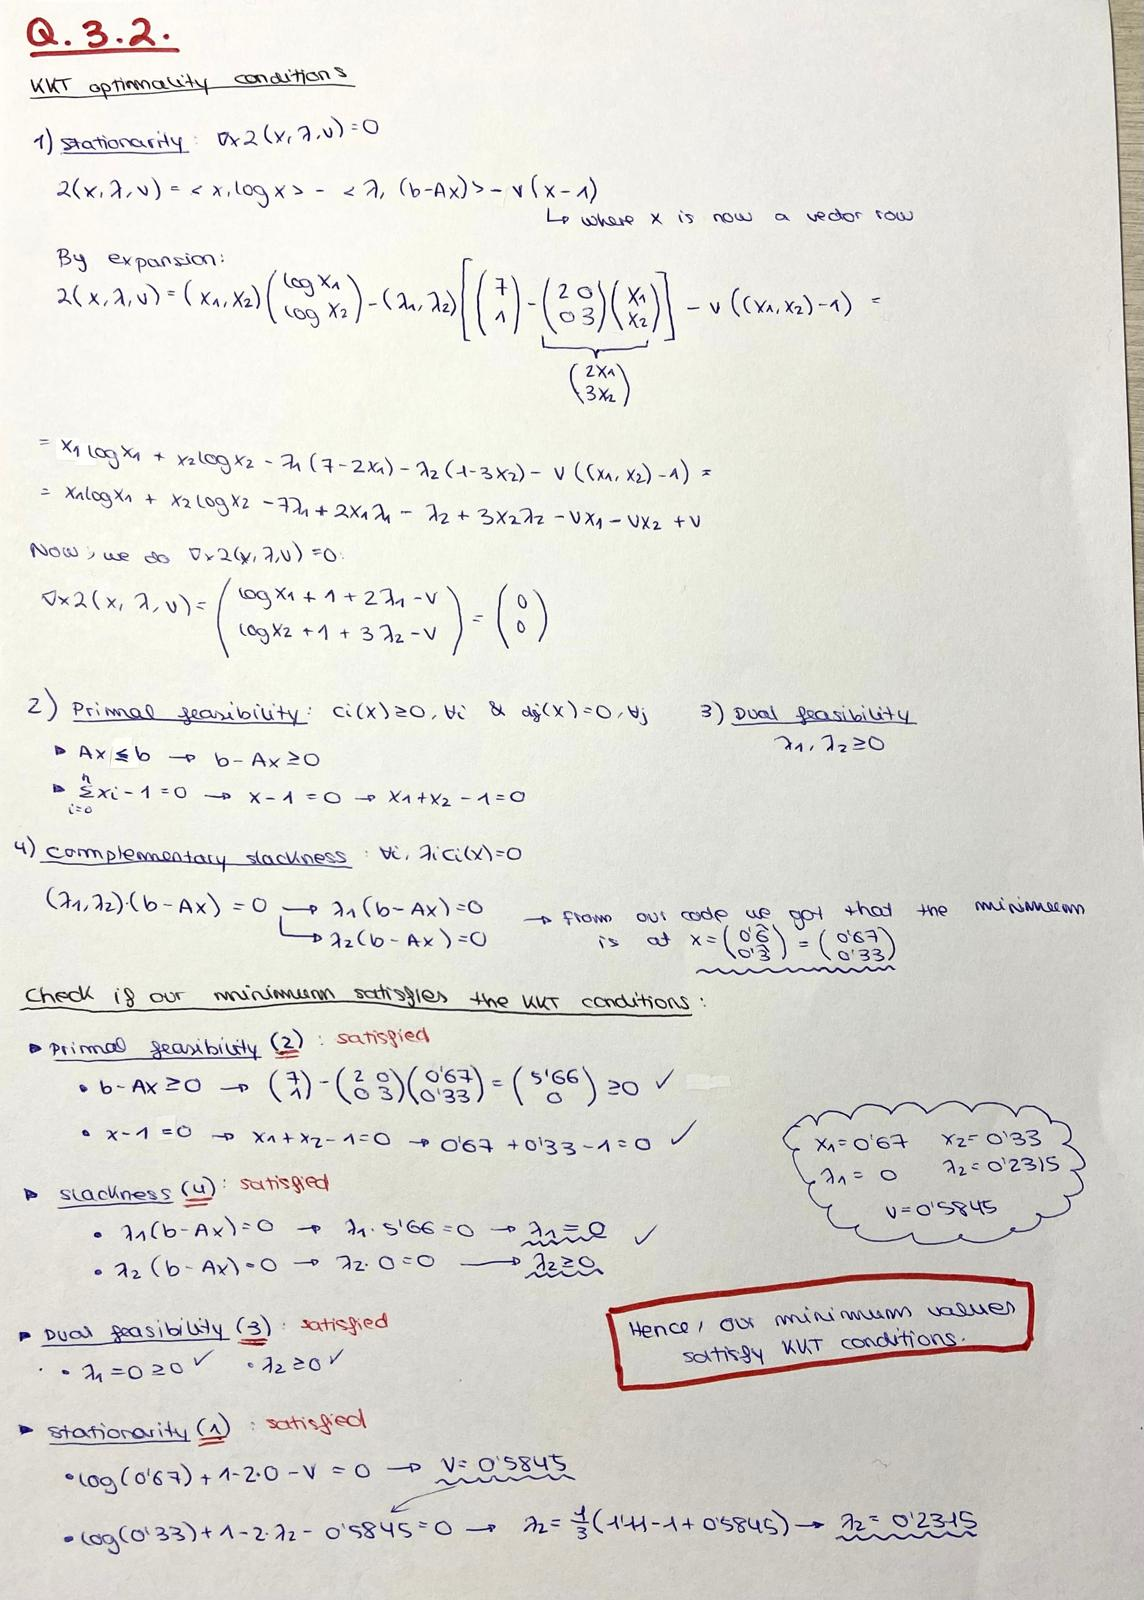

In [28]:
import math

# Lagrangian function
def lagrangian_1(x, lmbda):
    return objective_function_3(x) - np.dot(lmbda[:2], constraint1_3(x, A, b)) - lmbda[2] * constraint2_3(x)

# Gradient of the Lagrangian function
def lagrangian_gradient_1(x, lmbda):
    grad_x1 = np.log(x[0]) + 1 + lmbda[0] * -2 + lmbda[2] if x[0] > 0 else float('inf')
    grad_x2 = np.log(x[1]) + 1 + lmbda[1] * -3 + lmbda[2] if x[1] > 0 else float('inf')
    return np.array([grad_x1, grad_x2])

# KKT conditions
def kkt_conditions_1(x, lmbda):
    gradient = lagrangian_gradient_1(x, lmbda)
    return (
        np.all(constraint1_3(x, A, b) >= 0) and
        np.isclose(constraint2_3(x), 0) and
        np.all(lmbda[:2] >= 0) and
        np.all(np.isclose(lmbda[:2] * constraint1_3(x, A, b), 0)) and
        np.isclose(lmbda[2] * constraint2_3(x), 0) and
        np.all(np.isclose(gradient, 0))
    )

# Optimization problem
def solve_optimization_3():
    x0 = [0.5, 0.5]
    result = minimize(objective_function_3, x0, method='SLSQP', constraints=cons)

    print("Optimization result:")
    print("x =", result.x)
    print("f(x) =", result.fun)

    # Initial guess for dual variables (Lagrange multipliers)
    lmbda0 = [0, 0, 0]

    # Check if the minimum satisfies the KKT conditions
    minimum_1 = result.x

solve_optimization_3()

Optimization result:
x = [0.66666667 0.33333333]
f(x) = -0.27031007207210966
